# Colon cancer detector
<img src="download.jpg" alt="Image description" width="800" height="500">

This project contains a convolutional neural network (CNN) model for detecting colon cancer in histopathological images of colon tissue. The data includes images of benign colon tissue and colon adenocarcinomas.

### Import libs

In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense , Dropout, Conv2D, MaxPooling2D,Flatten
import os 
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax

import cv2

### Load Data

This data consists from 10000 Images 

-5000 benign

-5000 acadenocarcinomas

In [2]:
colon_aca_dir='Colon_cancer/colon_image_sets/colon_aca'
colon_n_dir="Colon_cancer/colon_image_sets/colon_n"
data_df=pd.DataFrame({'image':[ data for data in os.listdir(colon_aca_dir)+os.listdir(colon_n_dir)], 'labels': [1] * 5000 + [0] * 5000}) # Our data consists from 5000 acadenocarcinomas and 5000 benign

image_arrays=[]
k=0
for i in data_df['image']:
    img=load_img(os.path.join(colon_aca_dir if k < 5000 else colon_n_dir,i), target_size=(240,240))
    image_array=img_to_array(img)/255
    image_arrays.append(image_array)
    k+=1

data=np.array(image_arrays)
labels=data_df['labels'].to_numpy()


### Visualization

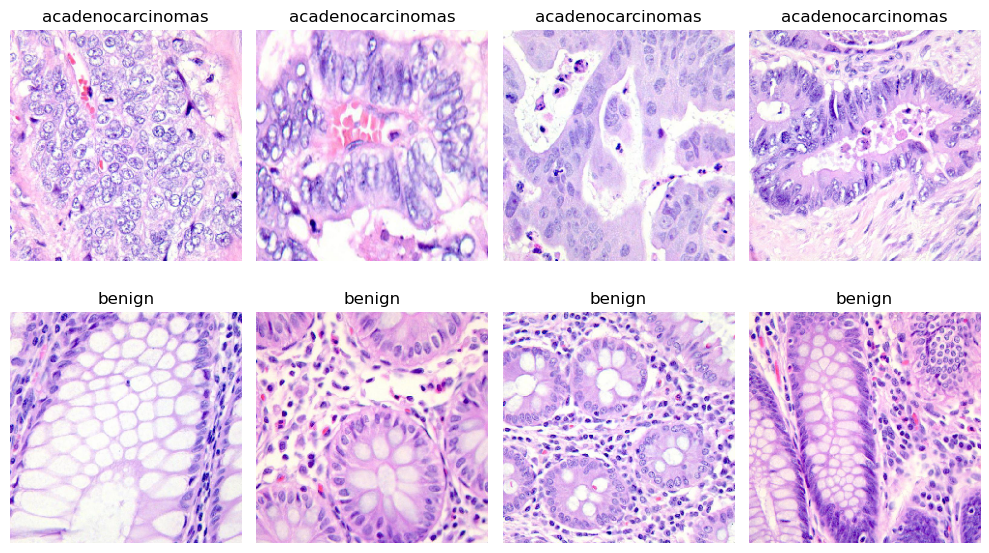

In [3]:
fig, ax=plt.subplots(2,4,figsize=(10,6))

for i in range(4):
    ax[0,i].imshow(data[i])
    ax[0,i].set_title('acadenocarcinomas')
    ax[0,i].axis('off')

    ax[1, i].imshow(data[i+5000])
    ax[1,i].set_title('benign')
    ax[1,i].axis('off')



plt.tight_layout()
plt.show()

### Preprocessing & Splitting Data  

In [4]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=.2,random_state=42)

### Model

In [9]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(240,240,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 239, 239, 32)      416       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 119, 119, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 118, 118, 32)      4128      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 58, 58, 16)        2064      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 29, 29, 16)       

In [10]:
model.compile(optimizer=Adamax(learning_rate= 0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/20
250/250 [==============================] - 62s 239ms/step - loss: 0.6466 - accuracy: 0.6254 - val_loss: 0.5093 - val_accuracy: 0.7645
Epoch 2/20
250/250 [==============================] - 53s 211ms/step - loss: 0.4544 - accuracy: 0.7935 - val_loss: 0.3729 - val_accuracy: 0.8520
Epoch 3/20
250/250 [==============================] - 54s 216ms/step - loss: 0.3535 - accuracy: 0.8514 - val_loss: 0.2660 - val_accuracy: 0.9000
Epoch 4/20
250/250 [==============================] - 52s 209ms/step - loss: 0.2756 - accuracy: 0.8919 - val_loss: 0.2534 - val_accuracy: 0.8945
Epoch 5/20
250/250 [==============================] - 52s 210ms/step - loss: 0.2448 - accuracy: 0.9024 - val_loss: 0.2519 - val_accuracy: 0.8950
Epoch 6/20
250/250 [==============================] - 51s 205ms/step - loss: 0.2048 - accuracy: 0.9208 - val_loss: 0.1824 - val_accuracy: 0.9315
Epoch 7/20
250/250 [==============================] - 57s 228ms/step - loss: 0.1849 - accuracy: 0.9294 - val_loss: 0.1772 - val_ac

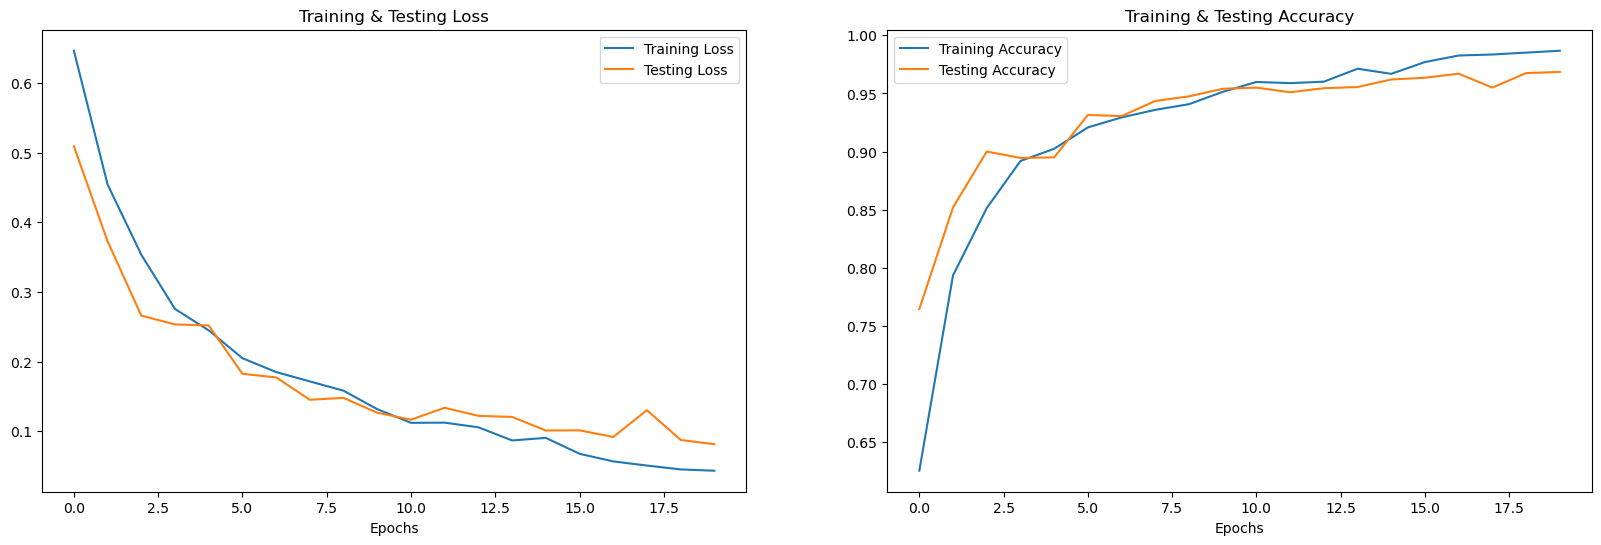

In [12]:

epochs = [i for i in range(len(history.history['loss']))]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()